<a href="https://colab.research.google.com/github/9M3a1h3d9i9/Machine_Learning_Practice_Master/blob/main/Stronghold_Crusaser_2_Number_of_Players(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Mahdi_CS_313
# Practice of ML

# بسم الله الرحمن الرحیم


# موضوع :
# تعداد بازیکنان بازی استراژیک آنلاین


> تحلیل داده های مربوط به تعداد بازیکنان بازی استراتژیک استرانگ هولد 2 -  آنلاین

> مولفه های درنظر گرفته عبارتست از :

1. ماه هر سال میلادی
2. حداکثربازیکنان در ماه جاری میلادی


**اهداف مورد نظر**


*   بررسی میزان رشد محبوبیت بازی انلاین
*   بررسی مدل رگرسیون خطی برای این نوع از داده ها





# import

# بارگذاری فایل

In [1]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Saving S_C_2__Number_of_players.csv to S_C_2__Number_of_players.csv


In [2]:
print(uploaded.keys())

dict_keys(['S_C_2__Number_of_players.csv'])


In [3]:
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
print(df)

            Month Avg. Players   Gain   % Gain Peak Players
0    Last 30 Days        297.7    2.1    0.70%          728
1          Sep-24        295.6   28.8   10.78%          728
2          Aug-24        266.8  -57.9  -17.82%          531
3          Jul-24        324.7   65.1   25.08%          592
4          Jun-24        259.6  -30.6  -10.54%          557
..            ...          ...    ...      ...          ...
135        Jul-13          0.2   -0.1  -25.76%            5
136        Jun-13          0.3    0.1   35.67%            5
137        May-13          0.2    0.1   71.80%            4
138        Apr-13          0.1    0.1  185.36%            3
139        Mar-13            0      0  -15.27%            1

[140 rows x 5 columns]


# بررسی نمونه های اول و آخر

In [4]:
df.head()

,Month,Avg. Players,Gain,% Gain,Peak Players
0,Last 30 Days,297.7,2.1,0.70%,728
1,Sep-24,295.6,28.8,10.78%,728
2,Aug-24,266.8,-57.9,-17.82%,531
3,Jul-24,324.7,65.1,25.08%,592
4,Jun-24,259.6,-30.6,-10.54%,557


In [5]:
df.tail()

,Month,Avg. Players,Gain,% Gain,Peak Players
135,Jul-13,0.2,-0.1,-25.76%,5
136,Jun-13,0.3,0.1,35.67%,5
137,May-13,0.2,0.1,71.80%,4
138,Apr-13,0.1,0.1,185.36%,3
139,Mar-13,0,0,-15.27%,1


# مشخصات فریم داده

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         140 non-null    object
 1   Avg. Players  140 non-null    object
 2   Gain          140 non-null    object
 3   % Gain        140 non-null    object
 4   Peak Players  140 non-null    object
dtypes: object(5)
memory usage: 5.6+ KB


# توضیحاتی از فریم داده

In [7]:
df.describe()

,Month,Avg. Players,Gain,% Gain,Peak Players
count,140,140,140,140,140
unique,140,129,125,140,125
top,Last 30 Days,0.3,0.1,0.70%,5
freq,1,3,6,1,7


# مشخص کردن نمودار های مورد نظر

In [27]:
X = df[ 'Month']
y = df['Peak Players']

print(X)

0      Last 30 Days
1            Sep-24
2            Aug-24
3            Jul-24
4            Jun-24
           ...     
135          Jul-13
136          Jun-13
137          May-13
138          Apr-13
139          Mar-13
Name: Month, Length: 140, dtype: object


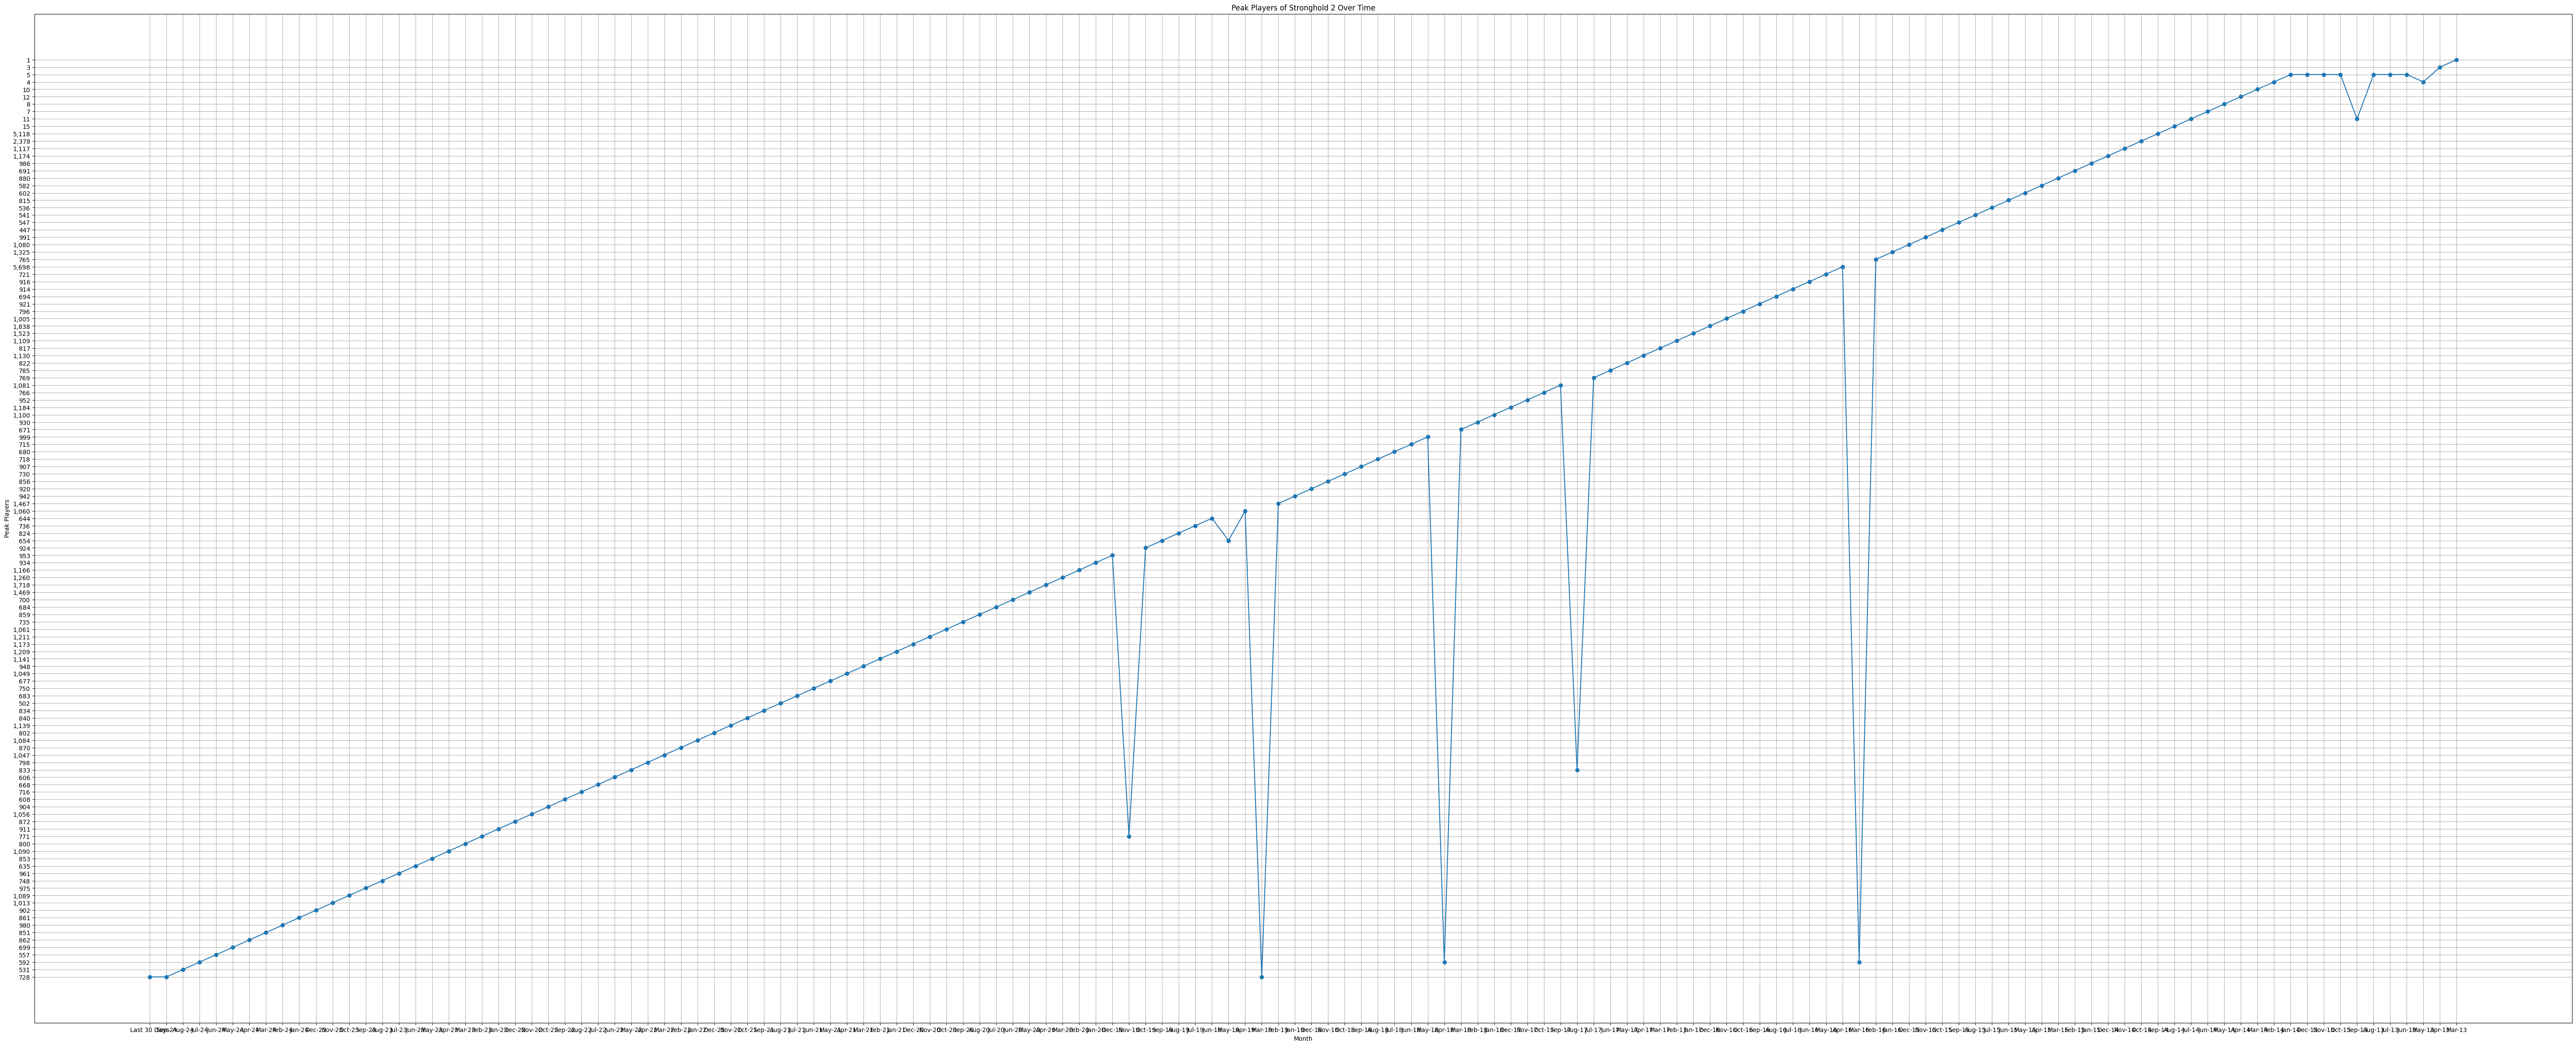

In [28]:
plt.figure(figsize=(75, 30))
plt.plot(X, y, marker='o')
plt.xlabel('Month')
plt.ylabel('Peak Players')
plt.title('Peak Players of Stronghold 2 Over Time')
plt.grid(True)
plt.show()

# کد ترسیم هیستو گرام

با مشخص کردن بازه 12 ماهه در تابع هیستوگرام و رنگ آبی اسمانی و دور حاشیه مشکی هر قسمت نمودار میله ای مشخص سده است

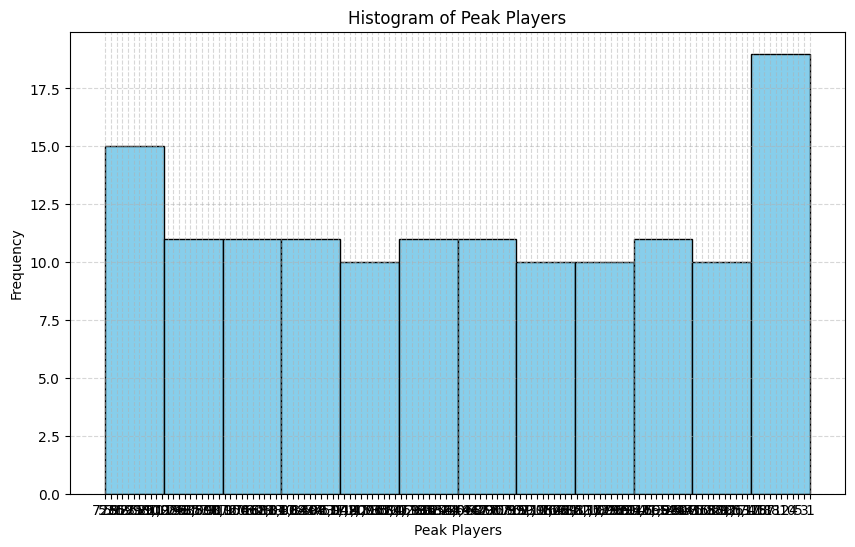

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(y, bins=12, color='skyblue', edgecolor='black')
plt.xlabel('Peak Players')
plt.ylabel('Frequency')
plt.title('Histogram of Peak Players')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#  تقسیم داده ها به دو مجموعه آموزشی و تست با تابع ذیل
# shuffle

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print("اندازه مجموعه آموزشی:", len(X_train))
print("اندازه مجموعه تست:", len(X_test))

اندازه مجموعه آموزشی: 112
اندازه مجموعه تست: 28


# تحلیل فایل CSV

# تحلیل نموداری
 از روی نمودار می توانیم ببینیم که تعداد بازی کنان بازی استرانگ هولد 2 در طول زمان نوسان داشته است در برخی از ماه ها، مانند ماه های ابتدایی و انتهایی، تعداد بازیکنان کمتر بوده است در برخی از ماه های دیگر، مانند ماه های میانی، تعداد بازیکنان بیشتر بوده است به طور کلی، می توان گفت که محبوبیت بازی استراننگ هولد 2 در طول زمان نوساناتی داشته است که ممکن است دلایل مختلفی برای این نوسان وجود داشته باشد، مانند فصل های مختلف، اتفاقات خاص در ماه های جاری، و یا رقیبان جدید مثل بازی های استراتژیک دیگر به علاوه، می توانیم ببینیم که در برخی از ماه ها، تعداد بازیکنان به طور ناگهانی افزایش یا کاهش یافته است این موارد ممکن است به دلیل رویدادهای خاصی مانند عرضه محتوا جدید یا تخفیف های ویژه نرم افزار استیم بوده است.


# این کد نسخه دوم و ویرایش شده است و بر اساس تمرین های ذیل به روز شده است :

# بارگذاری dataset انتخابی
# استفاده از تابع head  (خروجی نمای کلی از مجموعه داده)
# استفاده از تابع info (نمایش ساختار کلی ویژگی ها)
# متد value_counts
# متد describe
# کد ترسیم هیستو گرام
# تقسیم داده ها به دو مجموعه آموزشی و تست با تابع shuffle

##